<h1 style="text-align:center;">Probability theory</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p></p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# counts of different events
c = np.array([1,2,4,3])
probabilities = 100 * c / np.sum(c)
probabilities

array([10., 20., 40., 30.])

In [3]:
# Drawing marbles from a jar
blue = 40
yellow = 30
orange = 20
total = blue + yellow + orange

jar = np.hstack((1*np.ones(blue),2*np.ones(yellow),3*np.ones(orange))) # hstack = horizontal stacking
# 1 represents a blue, 2 a yellow, 3 an orange

numberOfDraws = 5000
draws = np.zeros(numberOfDraws)
for draw in range(numberOfDraws):
    randomMarble = int(np.random.rand() * len(jar))
    draws[draw] = jar[randomMarble]

proportionOfBlue   = sum(draws==1) / numberOfDraws
proportionOfYellow = sum(draws==2) / numberOfDraws
proportionOfOrange = sum(draws==3) / numberOfDraws
print(f'Proportion of blue  ={np.round(proportionOfBlue,3)}, theoretical probability={np.round(blue/total,3)}')
print(f'Proportion of yellow={np.round(proportionOfYellow,3)}, theoretical probability={np.round(yellow/total,3)}')
print(f'Proportion of orange={np.round(proportionOfOrange,3)}, theoretical probability={np.round(orange/total,3)}')

Proportion of blue  =0.433, theoretical probability=0.444
Proportion of yellow=0.328, theoretical probability=0.333
Proportion of orange=0.238, theoretical probability=0.222


<h1 style="text-align:center;">Odds</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>An odd is the probability of an event not occurring vs occurring</p>
<p>r = (1-p)/p</p>

<h1 style="text-align:center;">Probability functions</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>Probability: The chance of a specific event happening.</p>
<p>Probability mass: A function describing the probability of a set of exclusive, discrete events. </p>
<p>Probability density: A function describing the probability of a set of exclusive, continuous events. </p>
<p>Cumulative distribution function (cdf): The integral of the probability distribution function (pdf)</p>

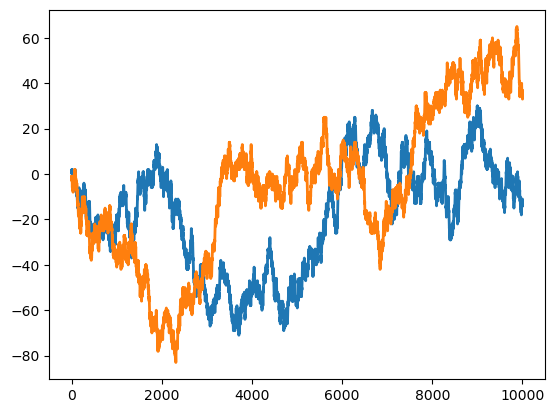

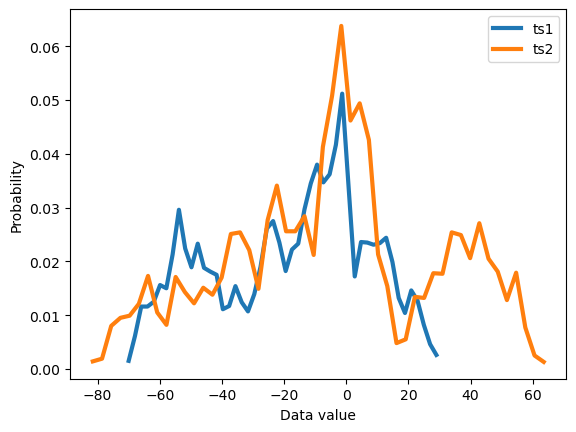

In [4]:
N = 10_004
data1 = np.cumsum( np.sign(np.random.randn(N)) )
data2 = np.cumsum( np.sign(np.random.randn(N)) )

plt.plot(np.arange(N),data1,linewidth=2)
plt.plot(np.arange(N),data2,linewidth=2)
plt.show()

bins = 50
y,x = np.histogram(data1,bins)
x1 = (x[1:] + x[:-1]) / 2
y1 = y/sum(y)
y,x = np.histogram(data2,bins)
x2 = (x[1:] + x[:-1]) / 2
y2 = y/sum(y)

plt.plot(x1,y1,x2,y2,linewidth=3)
plt.legend(('ts1','ts2'))
plt.xlabel('Data value')
plt.ylabel('Probability')
plt.show()

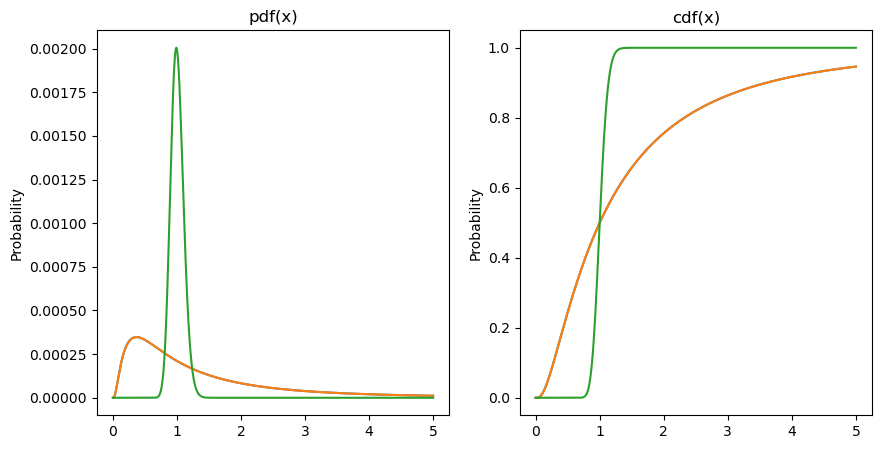

In [5]:
#cdf
x = np.linspace(0,5,10_001)
p1 = stats.lognorm.pdf(x,1)
c1 = stats.lognorm.cdf(x,1)

p2 = stats.lognorm.pdf(x,.1)
c2 = stats.lognorm.cdf(x,.1)

fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(x,p1/sum(p1))
ax[0].plot(x,p1/sum(p1), x,p2/sum(p2))
ax[0].set_ylabel('Probability')
ax[0].set_title('pdf(x)')

ax[1].plot(x,c1)
ax[1].plot(x,c1, x,c2)
ax[1].set_ylabel('Probability')
ax[1].set_title('cdf(x)')

plt.show()

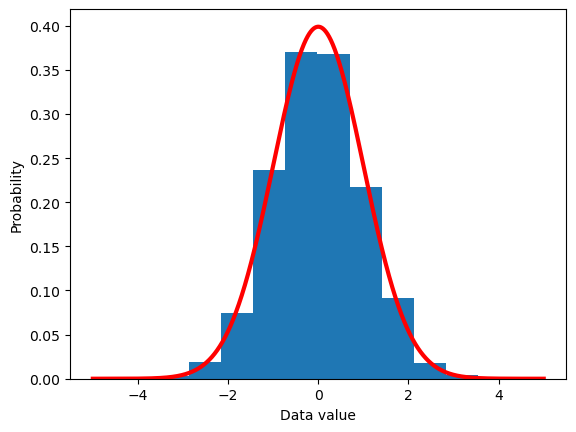

In [14]:
# Theoretical normal distribution
x = np.linspace(-5,5,10101)
theoNormDist = stats.norm.pdf(x)

# empirical distribution
samples = 4000
sampledata = np.zeros(samples)

for i in range(samples):
    sampledata[i] = np.random.randn()

plt.hist(sampledata,density=True)
plt.plot(x,theoNormDist,'r',linewidth=3)
plt.xlabel('Data value')
plt.ylabel('Probability')
plt.show()

In [18]:
# population
N = 1_000_000
population = np.random.randn(N)
population = population - np.mean(population) # population mean is 0

samplesize = 30
sampleindexes = np.random.randint(0,N,samplesize)
samplemean = np.mean( population[sampleindexes] )
print(samplemean)

0.020031709544576375


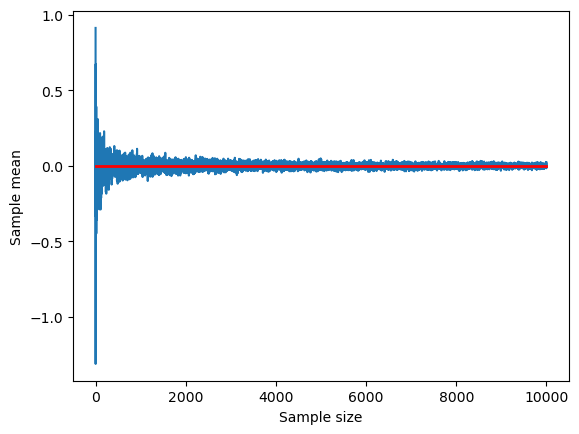

In [23]:
samplesizes = np.arange(1,10_000)
means = np.zeros(len(samplesizes))

for i in samplesizes:
    samplesize = i
    sampleindexes = np.random.randint(0,N,samplesize)
    samplemean = np.mean( population[sampleindexes] )
    means[i-1] = samplemean

plt.plot(samplesizes,means)
plt.plot([1,10_000],[0,0],'r',linewidth=2)
plt.xlabel('Sample size')
plt.ylabel('Sample mean')
plt.show()


In [25]:
np.mean(means) # mean of the means

-0.0002563988208890292

<h1 style="text-align:center;">Expected value</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p></p>